In [2]:
using Plots

In [3]:
using Statistics

In [4]:
function running_avg(x)
	x_avg = cumsum(x)
	for i ∈ 1:length(x)
		x_avg[i] = x_avg[i]/(i)
	end
	return x_avg, 0:10:10*length(x)-1
end

running_avg (generic function with 1 method)

In [5]:
function readLog(filename)
	
	steps = Int[]
	energy = Float64[]
	EtE = Float64[]
	RoG = Float64[]
	
 	open("raw/"*filename, "r") do file
	    start_reading = false 
	    for line in eachline(file)
	        if isempty(strip(line))
	            if start_reading
	                # If we've started reading and encounter an empty line, stop reading
	                break
	            else
	                # If we haven't started reading yet, this marks the start
	                start_reading = true
	                continue
	            end
	        end
	        
	        if start_reading
	            line_data = split(line, ',')
				print
	            push!(steps, parse(Int, line_data[1]))
	            push!(energy, parse(Float64, line_data[2]))
				push!(EtE, parse(Float64, line_data[3]))
	            push!(RoG, parse(Float64, line_data[4]))
	        end
	    end
	end 
	return steps,energy,EtE,RoG
end

readLog (generic function with 1 method)

In [6]:
T_arr = 40:-1:1

40:-1:1

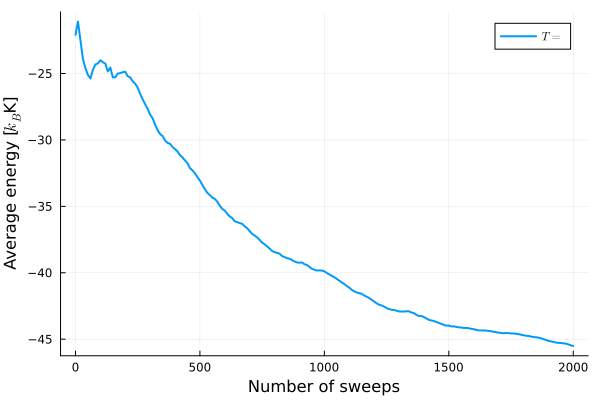

In [7]:
begin 
	MC100x10000 = readLog("MC_100x2000.txt") 
	plt_100 = plot()
	plot!(MC100x10000[1], running_avg(MC100x10000[2]), 
		xlabel = "Number of sweeps", ylabel = "Average energy [\$k_B\$K]", 
		label = "\$T = \$", linewidth = 2)
end

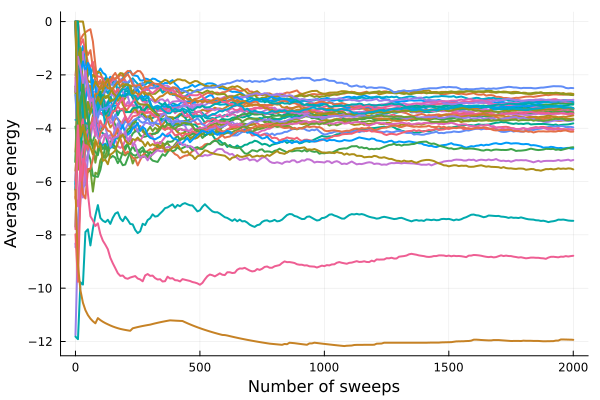

In [8]:
begin 
	plt_15 = plot() 
	for t in T_arr
		plot!(readLog("annealing/MC_10x2000_$(t)a.txt")[1],  running_avg(readLog("annealing/MC_10x2000_$(t)a.txt")[2]), 
			xlabel = "Number of sweeps", ylabel = "Average energy", 
			label = "", linewidth = 2)
		# plot!(legend=:outertopright)
	end 
plt_15
end

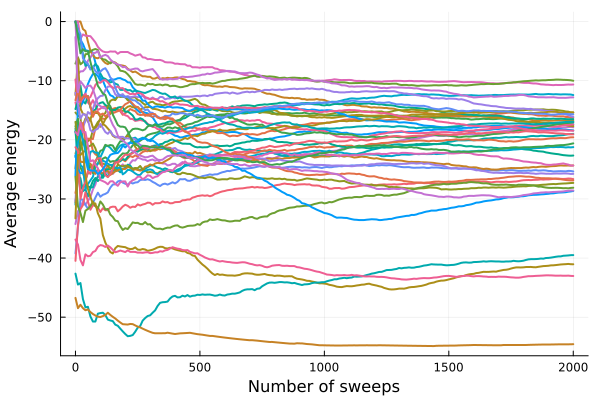

In [9]:
begin 
	plt_30 = plot() 
	for t in T_arr
		
		plot!(readLog("annealing/MC_40x2000_$(t)a.txt")[1], running_avg(readLog("annealing/MC_40x2000_$(t)a.txt")[2]), 
			xlabel = "Number of sweeps", ylabel = "Average energy", 
			label = "", linewidth = 2)
		# plot!(legend=:outertopright)
	end 
plt_30
end

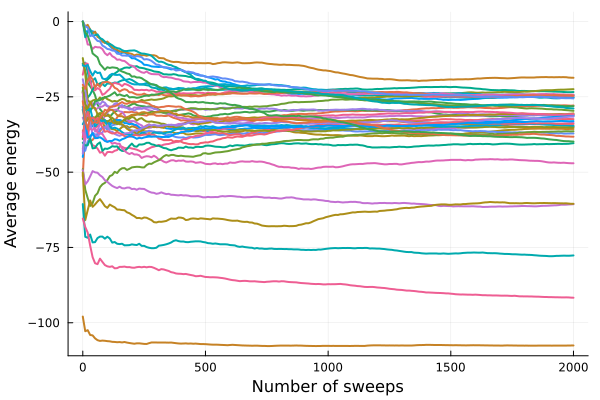

In [10]:
begin 
	plt_50 = plot() 
	for t in T_arr
		plot!(readLog("annealing/MC_70x2000_$(t)a.txt")[1], running_avg(readLog("annealing/MC_70x2000_$(t)a.txt")[2]), 
			xlabel = "Number of sweeps", ylabel = "Average energy", 
			label = "", linewidth = 2)
	end
plt_50
end

In [11]:
function plotET(N, vline)
	E_avg = Float64[]
	T_arr = collect(40:-1:1)
	for t in T_arr
		E = readLog("annealing/MC_$(N)x2000_$(t)a.txt")[2][50:end]
		push!(E_avg, sum(E)/length(E)) 
	end 
	plot!(T_arr,E_avg,xflip=true, label = "E_avg, N =$N")
	vline!([vline], label = "T = $vline")
	plot!(legend=:bottomleft)
end

plotET (generic function with 1 method)

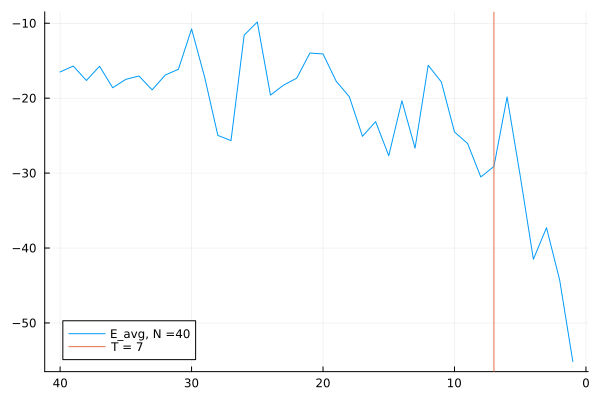

In [12]:
begin
	plot() 
	# plotET(10,10)
	plotET(40,7)
	# plotET(70,7)
end

In [13]:
function plotRoG(N, vline)
	RoG_avg = Float64[]
	T_arr = collect(40:-1:1)
	for t in T_arr
		RoG = readLog("annealing/MC_$(N)x2000_$(t)a.txt")[4][50:end]
		push!(RoG_avg, sum(RoG)/length(RoG)) 
	end 
	plot!(T_arr, running_avg(RoG_avg),xflip=true, label = "RoG_avg, N =$N")
	vline!([vline], label = "T = $vline")
	plot!(legend=:bottomleft)
end

plotRoG (generic function with 1 method)

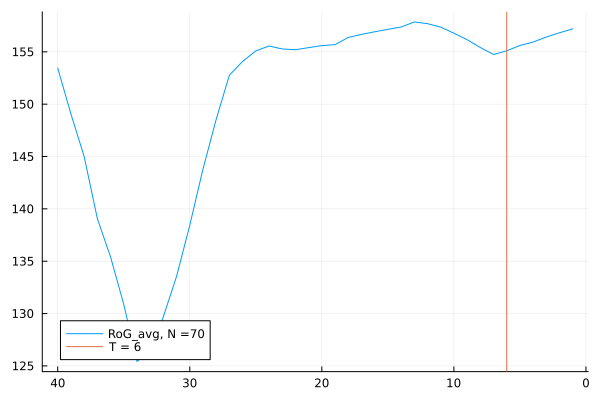

In [14]:
begin
	plot()
	plotRoG(70,6)
end